<a href="https://colab.research.google.com/github/piotrbruzda/Kurs-Data-Science/blob/main/Projekt_1_Pima_Indians_Diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Przygotowanie środowiska

### Importy bibliotek

In [205]:
# Import bibliotek
import matplotlib.pyplot as plt
from google.colab import drive
import pandas as pd

### Funkcje

#### Wizualizacja danych (show_chart)

In [206]:
def show_chart(dataframe_to_show):
  # Rozmiar wykresu
  plt.figure(figsize=(12, 10))

  # Iteracja po kolumnach DataFrame i rysowanie histogramów
  for i, col in enumerate(dataframe_to_show.columns):
      if col != 'Outcome':  # Wykluczamy kolumnę 'Outcome', ponieważ jest to kolumna binarna
          plt.subplot(3, 3, i + 1)
          plt.hist(dataframe_to_show[col], bins=20, color='skyblue', alpha=0.7)
          plt.xlabel(col)
          plt.ylabel('Liczba wystąpień')
          plt.title(f'Rozkład {col}')

  # Wyśrodkowanie tytułów i osi y
  plt.tight_layout()

  # Wyświetlenie wykresu
  plt.show()

In [207]:
import matplotlib.pyplot as plt
import numpy as np

def show_charts(dataframes_list, type="hist"):
    # Rozmiar wykresu
    plt.figure(figsize=(12, 10))

    # Tworzenie listy kolorów i wartości alfa w zależności od ilości DataFrame'ów
    num_dataframes = len(dataframes_list)
    colors = ['skyblue', 'salmon', 'lightgreen', 'orange', 'purple', 'yellow', 'pink']
    alphas = np.linspace(0.4, 0.6, num_dataframes)

    # Sortowanie DataFrame'ów względem ich długości
    dataframes_list_sorted = sorted(dataframes_list, key=lambda x: len(x['data']), reverse=True)

    # Iteracja po kolumnach DataFrame i rysowanie histogramów dla każdego datasetu z przypisanym kolorem i wartością alfa
    for dataframe, alpha in zip(dataframes_list_sorted, alphas):
        dataset_color = dataframe.get('color', colors.pop())

        for i, col in enumerate(dataframe['data'].columns):
            if col != 'Outcome':  # Wykluczamy kolumnę 'Outcome', ponieważ jest to kolumna binarna
                plt.subplot(3, 3, i + 1)
                if type == "hist":
                  plt.hist(dataframe['data'][col], bins=20, color=dataset_color, alpha=alpha)
                elif type == "box":
                    plt.boxplot([dataframe['data'][col]], positions=[i + 1], labels=[col], patch_artist=True,
                                boxprops=dict(facecolor=dataset_color, alpha=alpha))
                else:
                  raise Exception("Wrong chart type")

                plt.xlabel(col)
                plt.ylabel('Liczba wystąpień')
                plt.title(f'Rozkład {col}')

    # Wyśrodkowanie tytułów i osi y
    plt.tight_layout()

    # Tworzenie legendy kolorów
    legend_labels = [f"{df['name']} ({len(df['data'])} rekordów)" for df in dataframes_list_sorted]
    plt.legend(legend_labels, loc='upper right')

    # Wyświetlenie wykresu
    plt.show()


## Wczytywanie danych

In [208]:
# Montowanie dysku Google Drive w środowisku Google Colab
# i przypisanie go do katalogu "/content/gdrive/"
drive.mount('/content/gdrive')

project_path = '/content/gdrive/MyDrive/Colab Notebooks/Zadanie projektowe 1 - Pima Indians Diabetes Database/'

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [209]:
# Wczytywanie danych csv
diabetes_base = {
    'name': 'base',
    'data': pd.read_csv(project_path + "diabetes.csv")
    }

diabetes_base['data'].describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## Wizualizacja danych

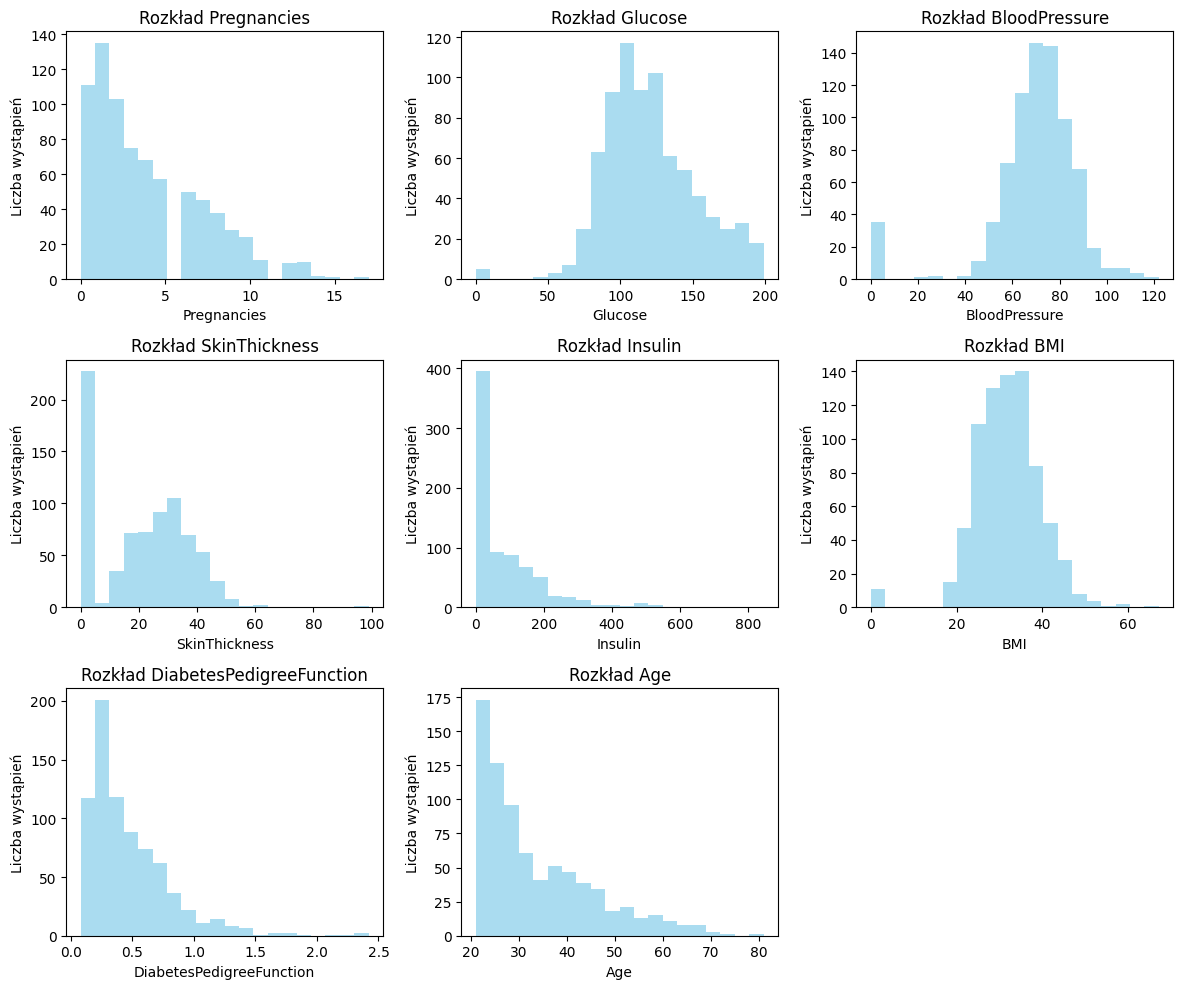

In [210]:
show_chart(diabetes_base['data'])

## Przygotowanie zbiorów danych

### Usunięcie niekompletnych danych (diabetes_strict)

In [211]:
# Przefiltrowanie danych w celu usunięcia wierszy, w których występują zera w kolumnach Glucose, BloodPressure, SkinThickness, Insulin i BMI
diabetes_strict = {
    'name': 'strict'
}
diabetes_strict['data'] = diabetes_base['data'][
    (diabetes_base['data']['BloodPressure'] != 0) &
    (diabetes_base['data']['SkinThickness'] != 0) &
    (diabetes_base['data']['BMI'] != 0)
]

# Wyświetlenie pierwszych kilku wierszy w nowym DataFrame
diabetes_strict['data'].describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,537.000000,537.000000,537.000000,537.000000,537.000000,537.000000,537.000000,537.000000,537.000000
mean,3.510242,119.903166,71.469274,29.186220,113.960894,32.890130,0.501823,31.586592,0.333333
std,3.304281,32.975142,12.302450,10.505807,122.894735,6.875842,0.343643,10.747286,0.471844
min,0.000000,0.000000,24.000000,7.000000,0.000000,18.200000,0.085000,21.000000,0.000000
25%,1.000000,97.000000,64.000000,22.000000,0.000000,27.800000,0.259000,23.000000,0.000000
50%,2.000000,115.000000,72.000000,29.000000,90.000000,32.800000,0.415000,28.000000,0.000000
75%,5.000000,141.000000,80.000000,36.000000,165.000000,36.900000,0.658000,38.000000,1.000000
max,17.000000,199.000000,110.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


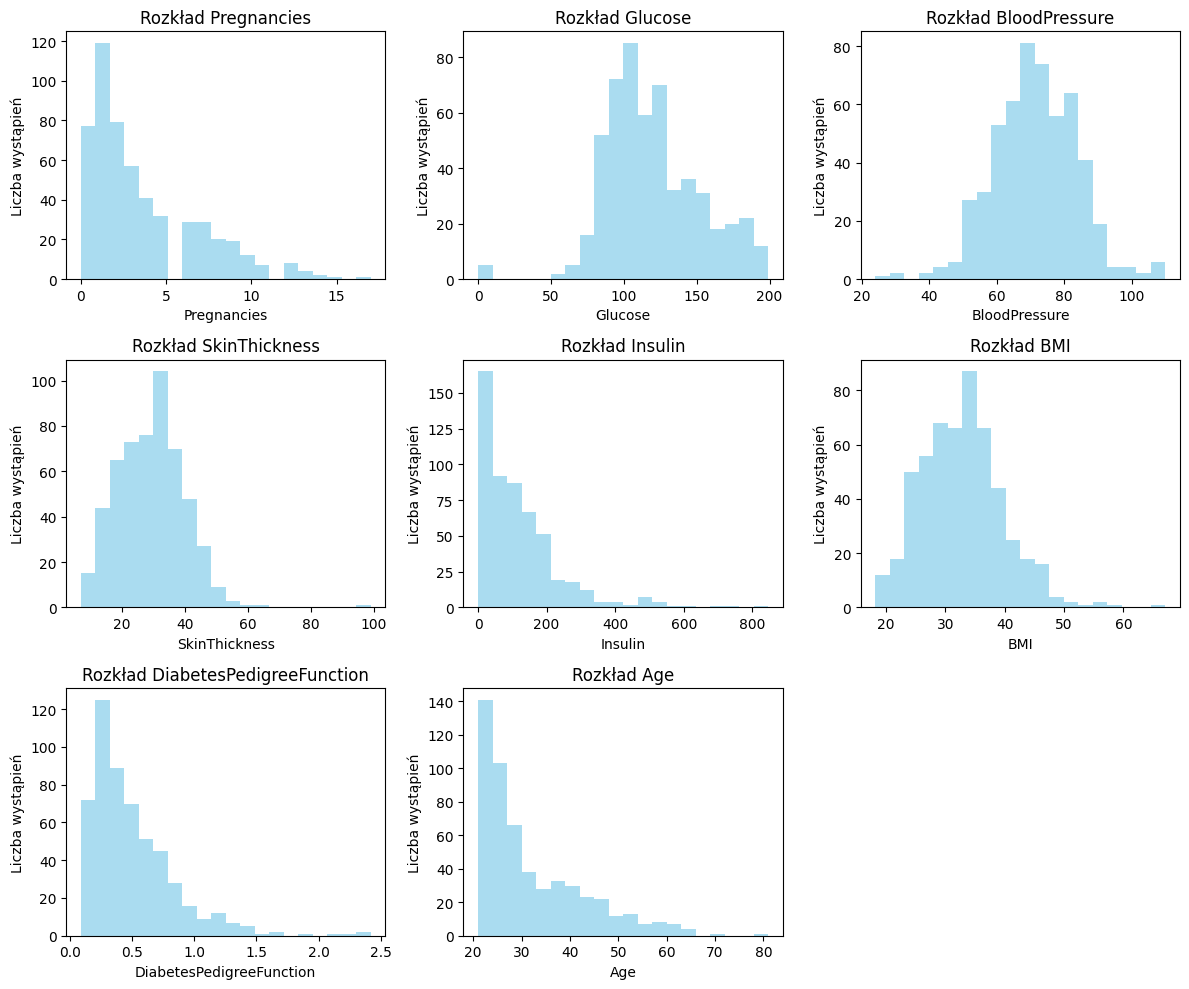

In [212]:
show_chart(diabetes_strict['data'])

### Zastąpienie niekompletnych danych medianą (diabetes_median)

In [213]:
# Lista kolumn, które zawierają wartości zerowe do zastąpienia
columns_with_zeros = ['BloodPressure', 'SkinThickness', 'BMI']

# Tworzenie nowego DataFrame diabetes_median['data'] i zastępowanie zer medianą
diabetes_median = {
    'name': 'median'
}
diabetes_median['data'] = diabetes_base['data'].copy()

# Uzupełnienie zer medianą odpowiedniej kolumny w nowym DataFrame
for column in columns_with_zeros:
    median_value = diabetes_strict['data'][column].median()
    diabetes_median['data'][column] = diabetes_median['data'][column].replace(0, median_value)



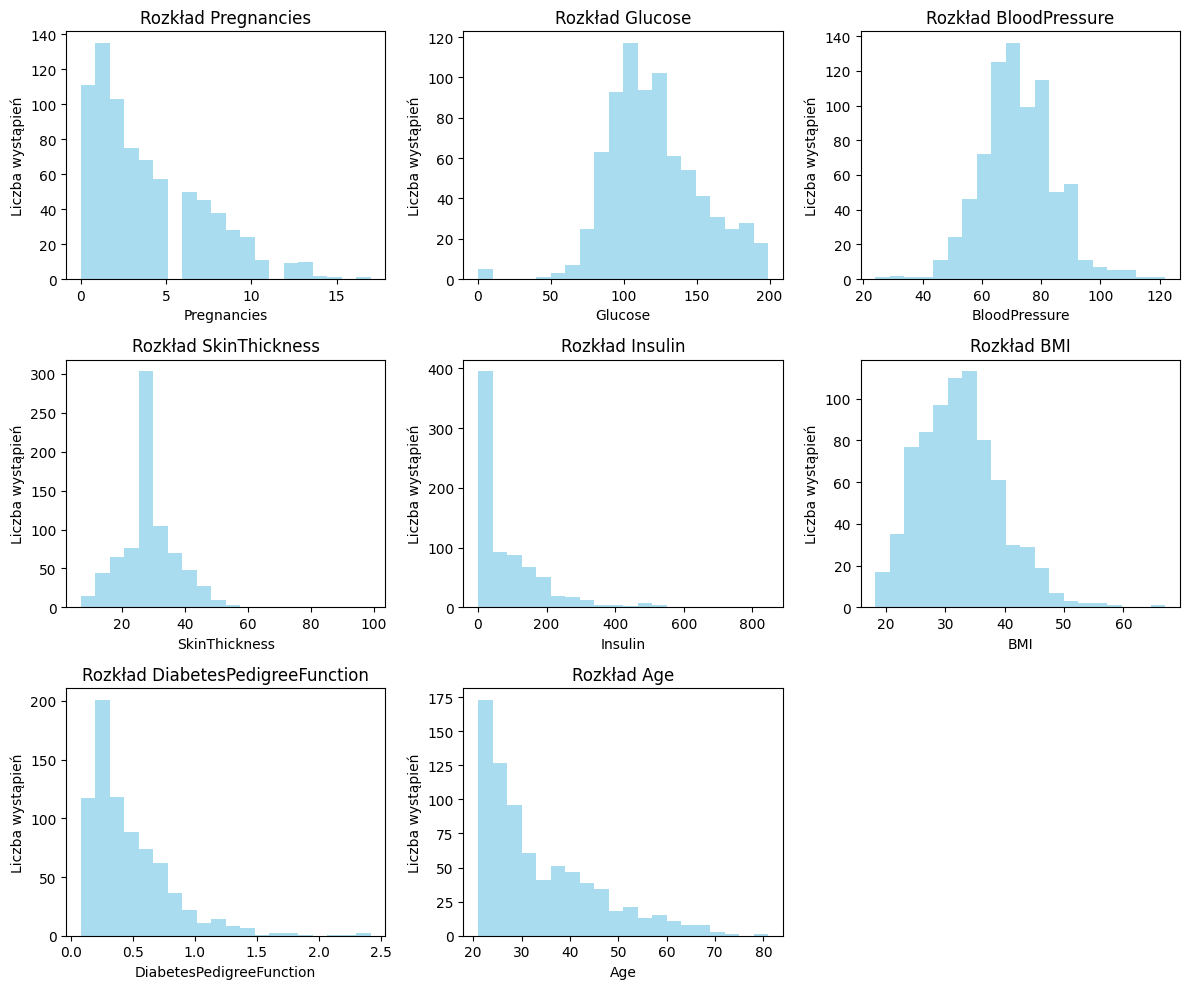

In [214]:
show_chart(diabetes_median['data'])

### Zastąpienie niekompletnych danych wartościa średnią (diabetes_mean)

In [215]:
# Lista kolumn, które zawierają wartości zerowe do zastąpienia
columns_with_zeros = ['BloodPressure', 'SkinThickness', 'BMI']

# Tworzenie nowego DataFrame diabetes_mean['data'] i zastępowanie zer średnią
diabetes_mean = {
    'name': 'mean'
}
diabetes_mean['data'] = diabetes_base['data'].copy()

# Uzupełnienie zer średnią odpowiedniej kolumny w nowym DataFrame
for column in columns_with_zeros:
    mean_value = diabetes_strict['data'][column].mean()
    diabetes_mean['data'][column] = diabetes_mean['data'][column].replace(0, mean_value)


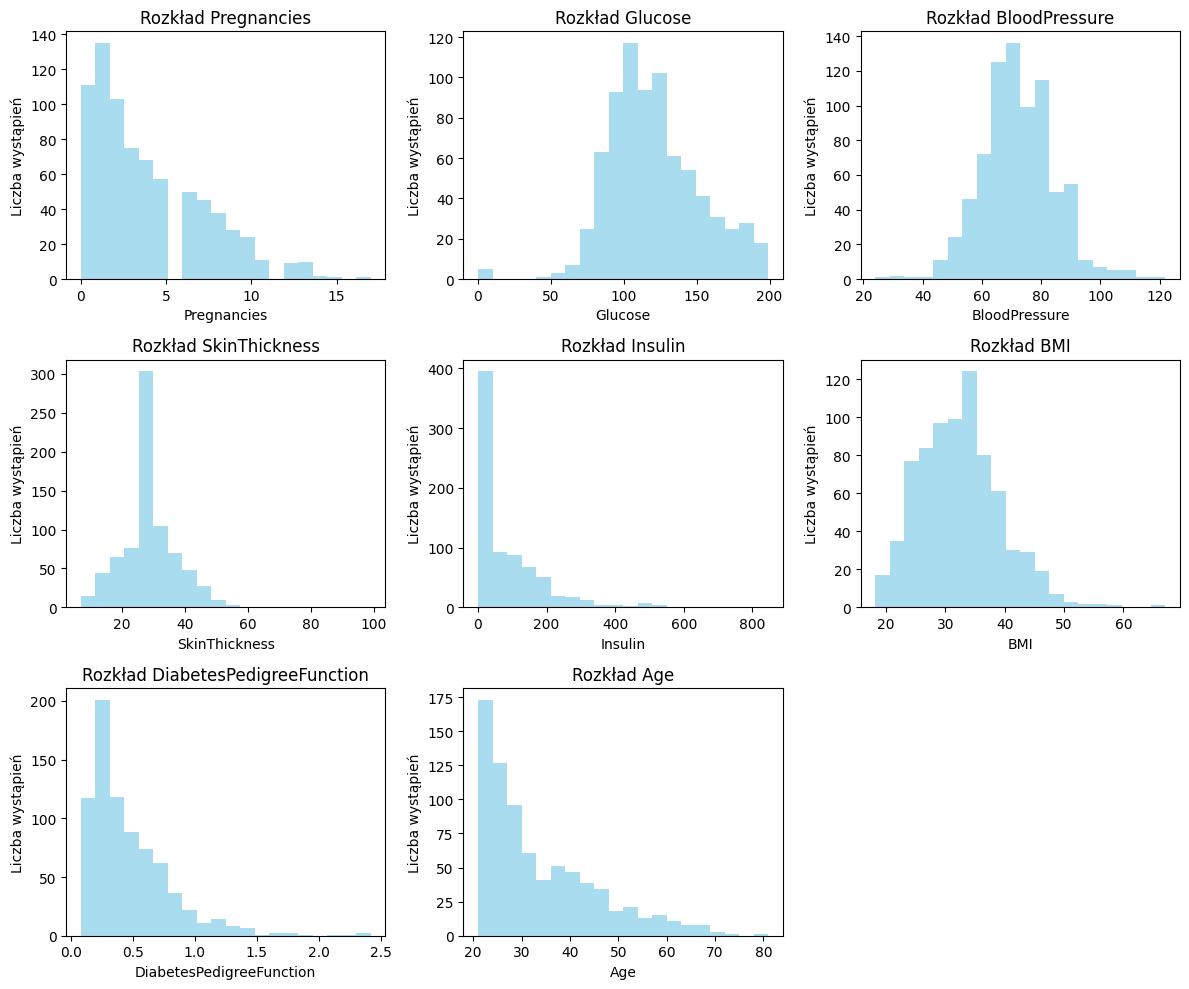

In [216]:
show_chart(diabetes_mean['data'])

### Podział na wiek (diabetes_young, diabetes_old)

In [217]:
# Tworzenie nowego DataFrame
diabetes_young = {
    'name': 'young'
}
diabetes_old = {
    'name': 'old'
}
diabetes_young['data'] = diabetes_median['data'].copy()
diabetes_old['data'] = diabetes_median['data'].copy()

# Tylko osoby młodsze od 30
diabetes_young['data'] = diabetes_young['data'].loc[diabetes_young['data']['Age'] < 30]
# Tylko osoby starsze niż 30
diabetes_old['data'] = diabetes_old['data'].loc[diabetes_old['data']['Age'] >= 30]


In [218]:
diabetes_young['data'].shape

(396, 9)

In [219]:
diabetes_old['data'].shape

(372, 9)

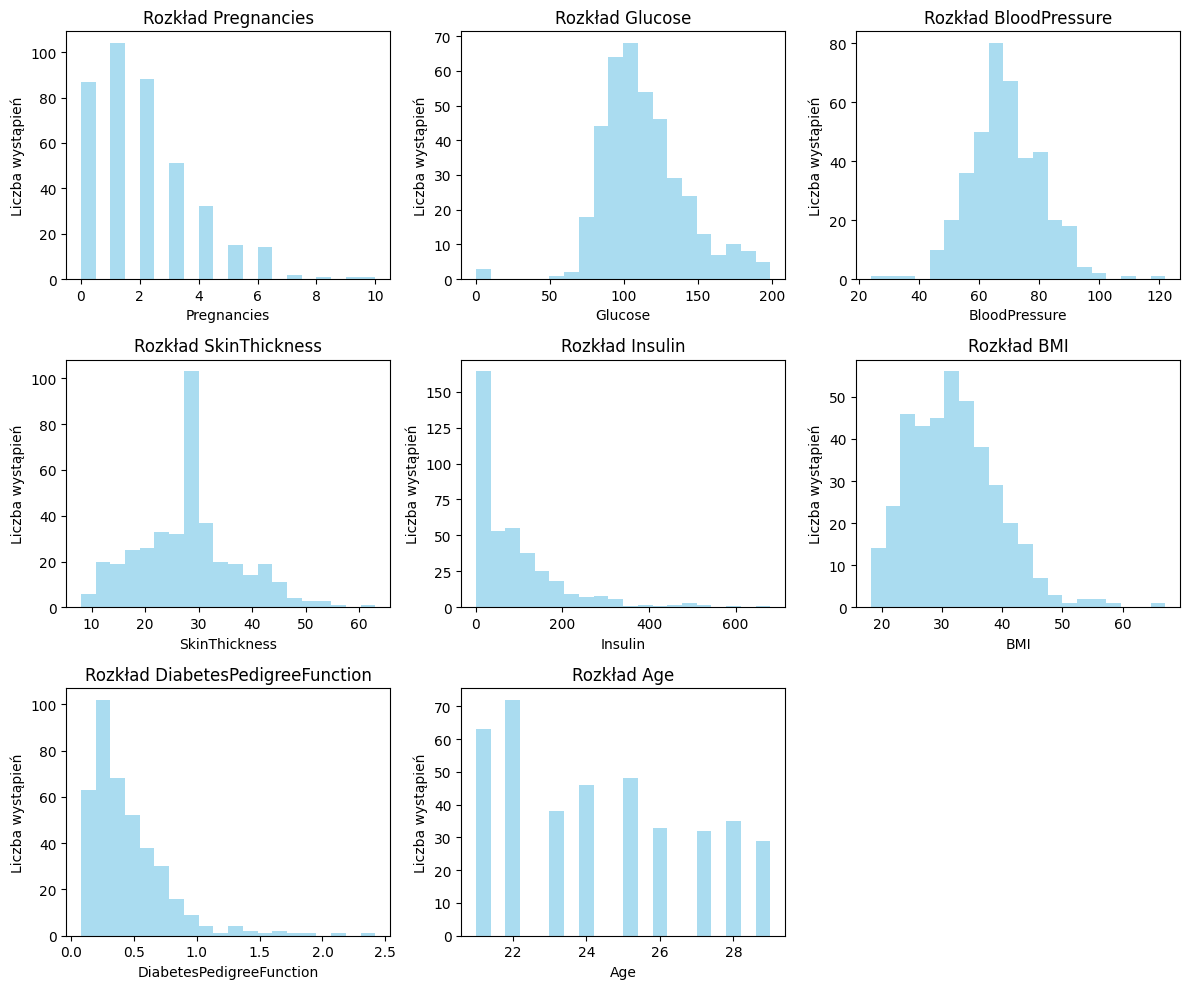

In [220]:
show_chart(diabetes_young['data'])

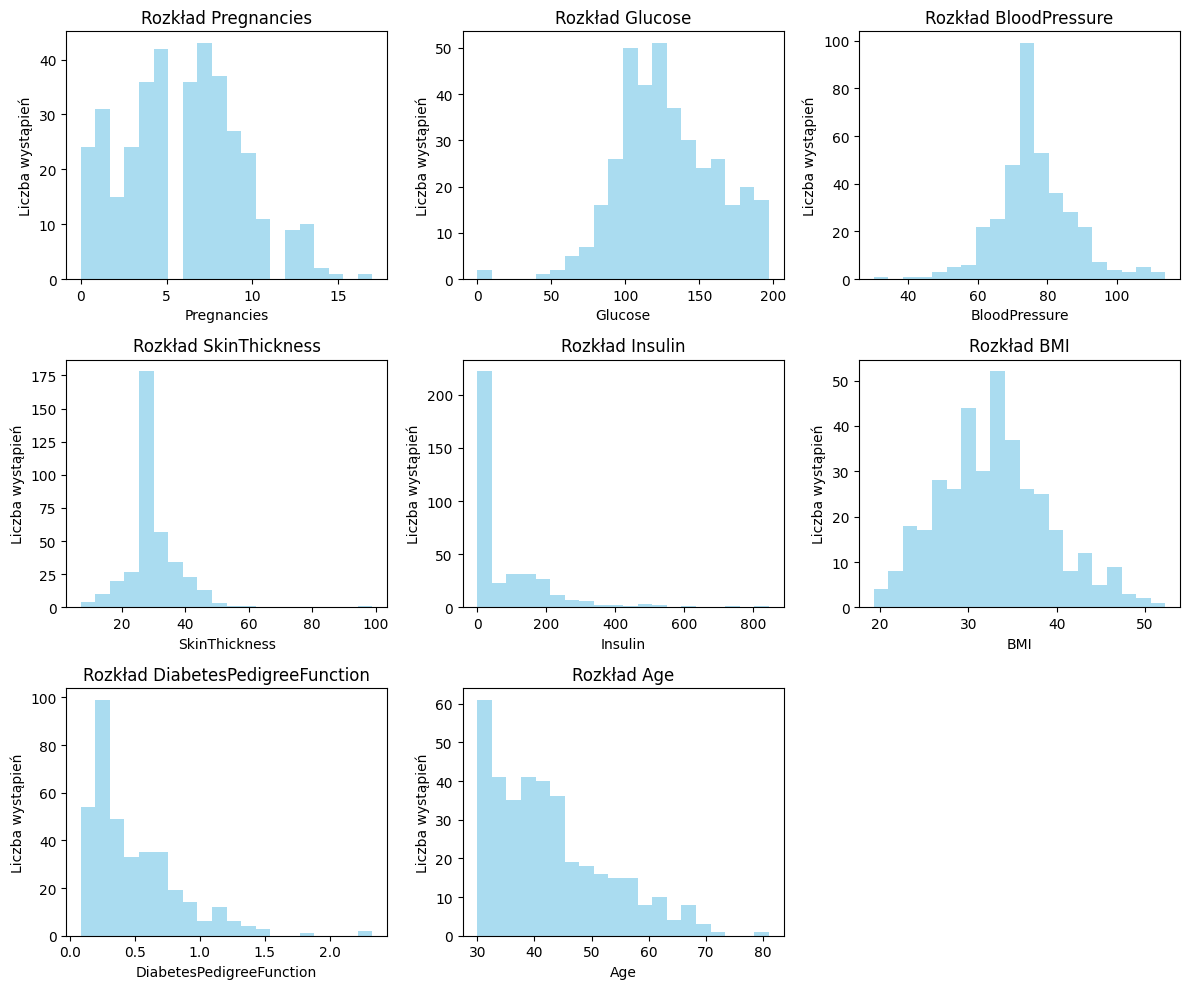

In [221]:
show_chart(diabetes_old['data'])

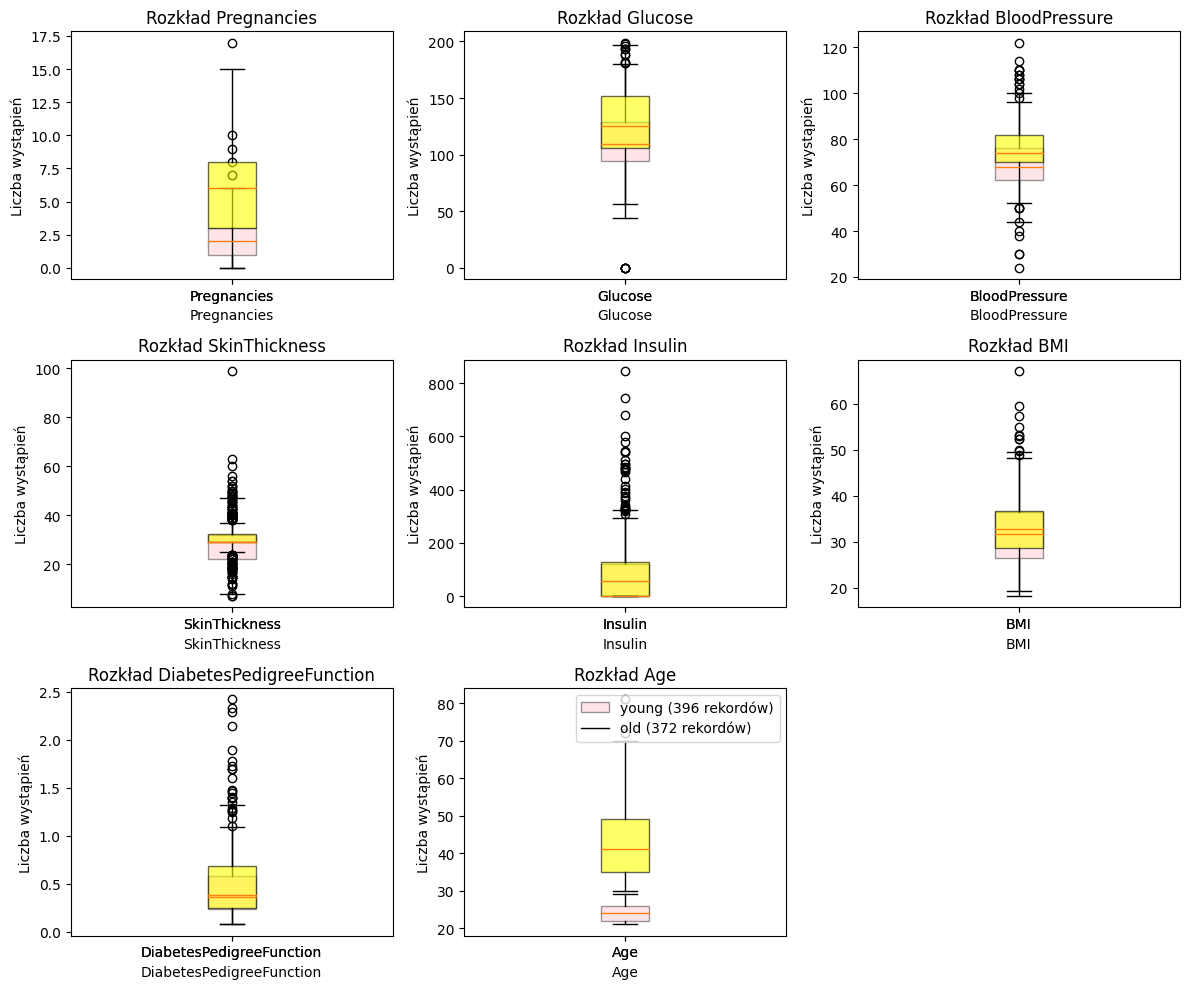

In [222]:
show_charts([diabetes_young, diabetes_old], type="box")

### Zebranie zbiorów danych (diabetes)

In [223]:

diabetes = [diabetes_base, diabetes_strict, diabetes_mean, diabetes_median, diabetes_young, diabetes_old]

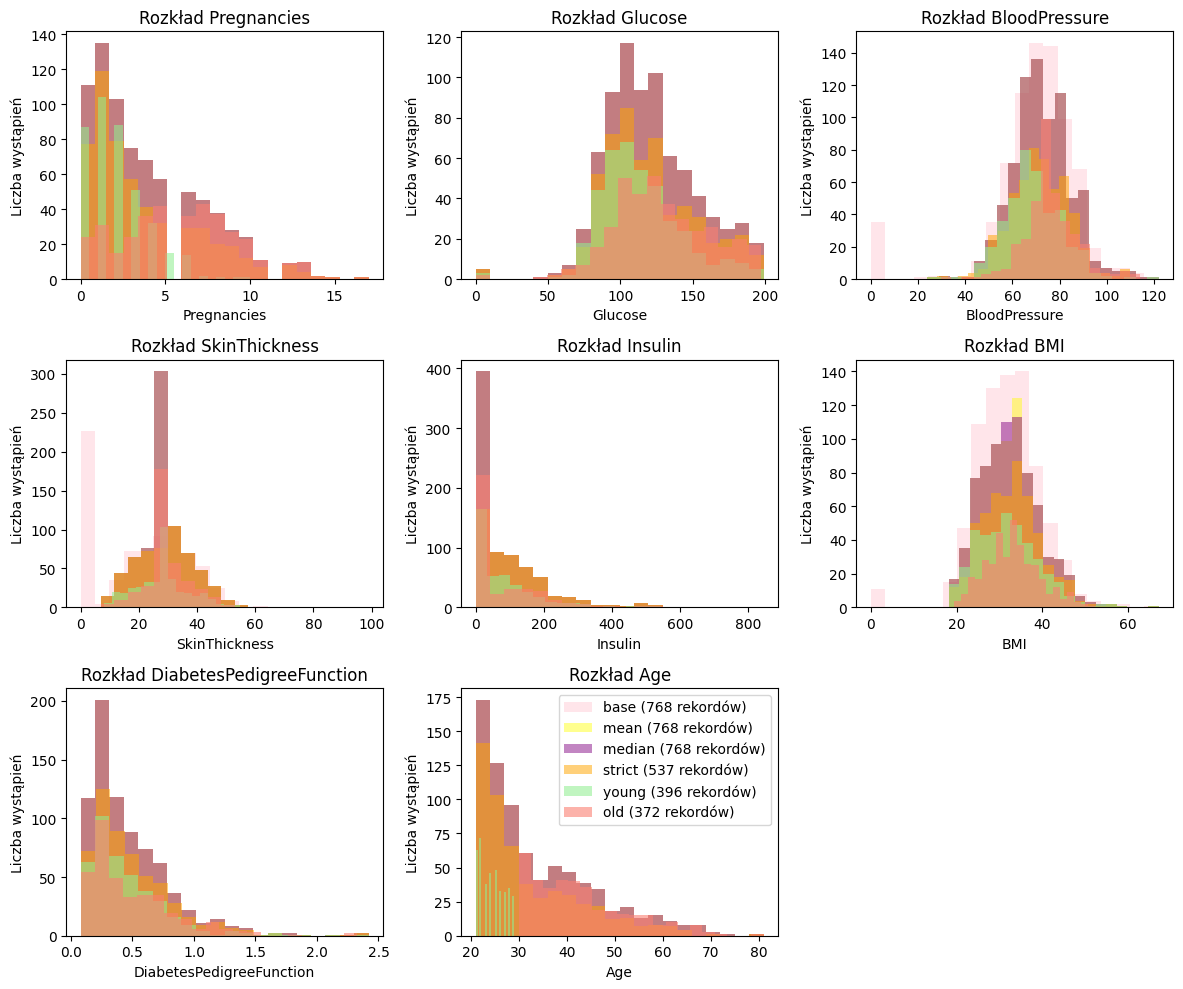

In [224]:
show_charts(diabetes)

##

## Modele uczenia maszynowego


### Wczytanie bibliotek oraz funkcje do uczenia i oceny modeli

In [225]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

#### Uczenie wybranego modelu i zwrócenie precyzji

In [226]:
def train_model_accuracy(training_dataset, model_type, verification_dataset=None, show_report=False):
  # Podział danych na cechy (X) i wynik (Y)
  X = training_dataset['data'].drop('Outcome', axis=1)
  Y = training_dataset['data']['Outcome']

  if verification_dataset:
    # Weryfikacja na datasecie strict, podział danych na cechy (X) i wynik (Y)
    X_verification = verification_dataset['data'].drop('Outcome', axis=1)
    Y_verification = verification_dataset['data']['Outcome']

  # Podział danych na zbiór treningowy i testowy
  X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

  # Inicjalizacja modelu
  if model_type == "LogisticRegression":
    model = LogisticRegression(max_iter=5000)
  elif model_type == "DecisionTreeClassifier":
      model = DecisionTreeClassifier()
  elif model_type == "RandomForestClassifier":
    model = RandomForestClassifier()
  elif model_type == "SVC":
    model = SVC()
  else:
    raise Exception("No proper model selected")


  # Trenowanie modelu na zbiorze treningowym
  model.fit(X_train, Y_train)

  # Przewidywanie wyników na zbiorze testowym
  Y_pred = model.predict(X_test)

  # Dokładność predykcji
  accuracy_self = accuracy_score(Y_test, Y_pred)

  # Przewidywanie wyników na zbiorze strict
  if verification_dataset:
    Y_verification_pred = model.predict(X_verification)
    accuracy_verification = accuracy_score(Y_verification, Y_verification_pred)
  else:
    accuracy_verification = None

  # Raport klasyfikacji
  if show_report:
    print(classification_report(Y_test, Y_pred))

  return accuracy_self, accuracy_verification, model

#### Uczenie modeli w pętli i zbieranie wyników precyzji

In [238]:
def get_model_accuracy(model_type, repeats=100, verification_dataset=None, show_report=False):
  # Lista, w której będziemy przechowywać wyniki accuracy dla każdego datasetu
  accuracy_self_results = []
  accuracy_verification_results = []

  # Pętla powtarzająca liczenie dokładności i zbierająca wyniki
  for x in range(repeats):
      accuracy_self_list = []
      accuracy_verification_list = []
      # Ucz model na każdym datasecie
      for dataset in diabetes:
          accuracy_self, accuracy_verification, _ = train_model_accuracy(dataset, model_type=model_type, verification_dataset=verification_dataset, show_report=show_report)
          # Zapisz precyzję na danych testowych ze swojego zbioru
          accuracy_self_list.append(accuracy_self)
          # Zapisz precyzję na danych weryfikacyjnych jeśli podano konkretny zbiór
          if verification_dataset:
            accuracy_verification_list.append(accuracy_verification)

      # Zapisz precyzję na danych testowych ze swojego zbioru
      accuracy_self_results.append(accuracy_self_list)
      # Zapisz precyzję na danych weryfikacyjnych jeśli podano konkretny zbiór
      if verification_dataset:
        accuracy_verification_results.append(accuracy_verification_list)

  verification_name = verification_dataset['name'] if verification_dataset else None

  return accuracy_self_results, accuracy_verification_results, verification_name

#### Wyświetlanie wyników precyzji

In [239]:
def display_precision_boxes(accuracy_self_results, accuracy_verification_results, verification_name):
  # Tworzenie wykresu pudełkowego dla każdego datasetu
  plt.figure(figsize=(15, 6))
  labels = [dataset['name'] for dataset in diabetes]  # Etykiety dla każdego datasetu

  # Szerokość pudełek
  box_width = 0.2

  for dataset_idx in range(len(diabetes)):
      dataset_self_accuracy = [result[dataset_idx] for result in accuracy_self_results]
      box_self = plt.boxplot(dataset_self_accuracy, positions=[dataset_idx - box_width], labels=[labels[dataset_idx]], widths=box_width, patch_artist=True, boxprops=dict(facecolor="skyblue", alpha=0.5))
      if accuracy_verification_results:
        dataset_verification_accuracy = [result[dataset_idx] for result in accuracy_verification_results]
        box_verification = plt.boxplot(dataset_verification_accuracy, positions=[dataset_idx + box_width], labels=[labels[dataset_idx]], widths=box_width, patch_artist=True, boxprops=dict(facecolor="salmon", alpha=0.5))


  verification_title = " i datasecie weryfikacyjnym " + verification_name if verification_name else ""

  plt.xlabel('Uczenie na zbiorze')
  plt.ylabel('Accuracy')
  plt.title(f'Wykres pudełkowy dokładności predykcji dla {num_repeats} powtórzeń na danych testowych ze swojego datasetu' + verification_title)
  plt.grid(True)

  # Tworzenie legendy
  legend_self = plt.Rectangle((0, 0), 1, 1, fc="skyblue", alpha=0.5)
  if accuracy_verification_results:
    legend_verification = plt.Rectangle((0, 0), 1, 1, fc="salmon", alpha=0.5)
    plt.legend([legend_self, legend_verification], ['własne dane testowe', 'dataset ' + verification_name], loc='upper left')

  # Dopasowanie etykiet na osiach x
  plt.xticks(range(len(diabetes)), labels, rotation=45, ha="right")
  plt.tight_layout()

  # Wyświetlenie wykresu
  plt.show()

### Regresja logistyczna

In [240]:
# Uczenie i zbieranie danych
accuracy_self_results, accuracy_verification_results, verification_name = get_model_accuracy(model_type="LogisticRegression",
                                                                                             verification_dataset=diabetes_median)

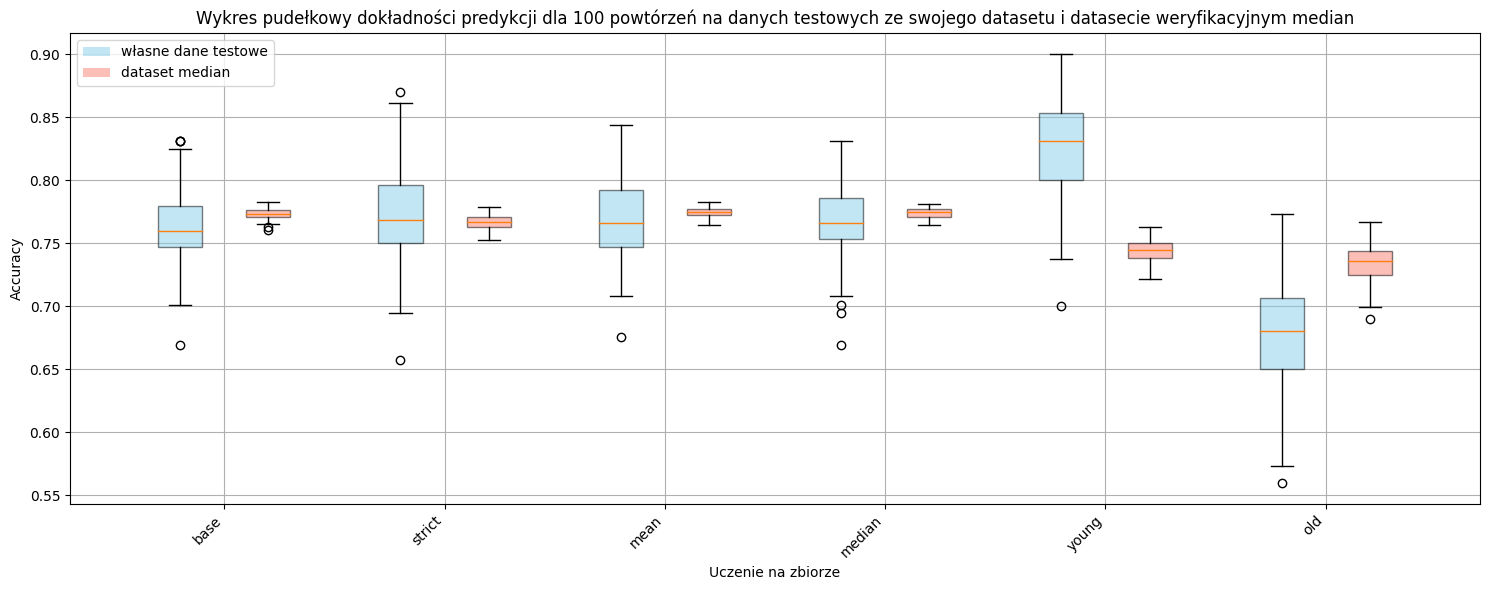

In [241]:
# Tworzenie wykresu pudełkowego dla każdego datasetu
display_precision_boxes(accuracy_self_results, accuracy_verification_results, verification_name)

### Drzewa decyzyjne

In [242]:
# Uczenie i zbieranie danych
accuracy_self_results, accuracy_verification_results, verification_name = get_model_accuracy(model_type="DecisionTreeClassifier",
                                                                                             verification_dataset=diabetes_median)

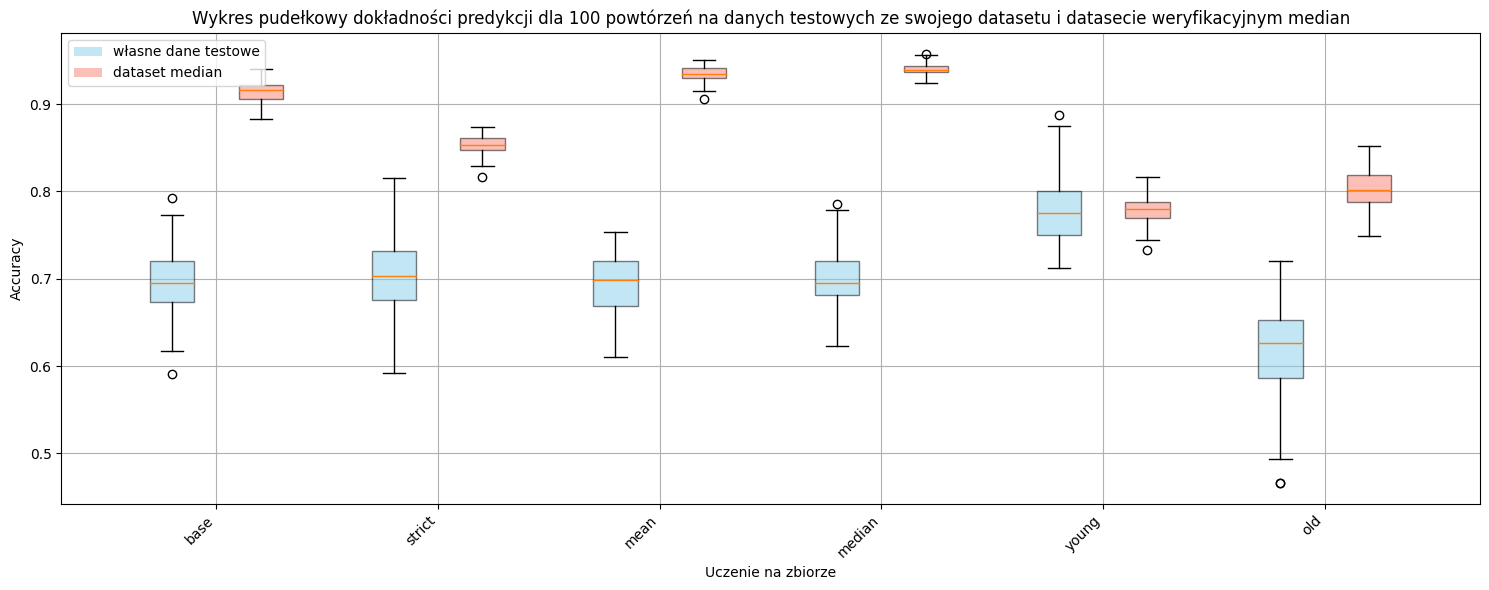

In [243]:
# Tworzenie wykresu pudełkowego dla każdego datasetu
display_precision_boxes(accuracy_self_results, accuracy_verification_results, verification_name)

### Las losowy

In [244]:
# Uczenie i zbieranie danych
accuracy_self_results, accuracy_verification_results, verification_name = get_model_accuracy(model_type="RandomForestClassifier",
                                                                                             verification_dataset=diabetes_median,
                                                                                             repeats=25)

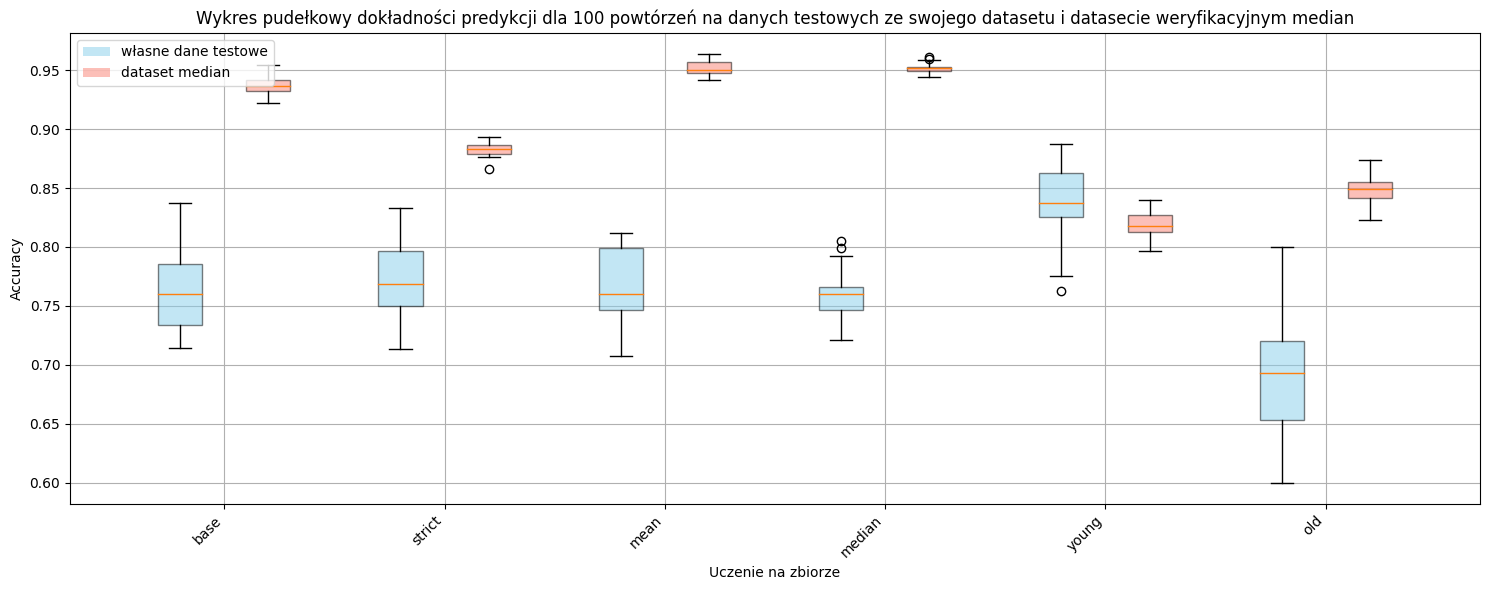

In [245]:
# Tworzenie wykresu pudełkowego dla każdego datasetu
display_precision_boxes(accuracy_self_results, accuracy_verification_results, verification_name)

### SVM

In [246]:
# Uczenie i zbieranie danych
accuracy_self_results, accuracy_verification_results, verification_name = get_model_accuracy(model_type="SVC",
                                                                                             verification_dataset=diabetes_median)

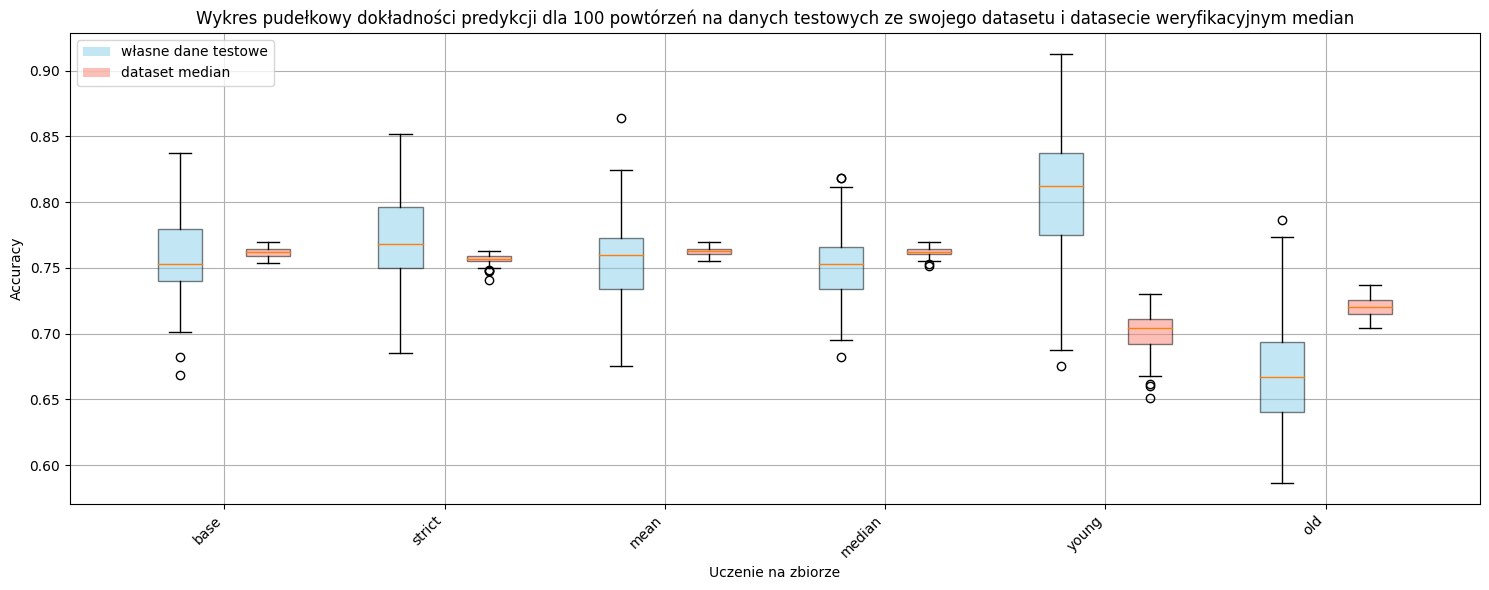

In [247]:
# Tworzenie wykresu pudełkowego dla każdego datasetu
display_precision_boxes(accuracy_self_results, accuracy_verification_results, verification_name)